##  背景

火力发电的基本原理是：燃料在燃烧时加热水生成蒸汽，蒸汽压力推动汽轮机旋转，然后汽轮机带动发电机旋转，产生电能。在这一系列的能量转化中，影响发电效率的核心是锅炉的燃烧效率，即燃料燃烧加热水产生高温高压蒸汽。锅炉的燃烧效率的影响因素很多，包括锅炉的可调参数，如燃烧给量，一二次风，引风，返料风，给水水量；以及锅炉的工况，比如锅炉床温、床压，炉膛温度、压力，过热器的温度等。

## 数据说明

数据分成训练数据（train.txt）和测试数据（test.txt），其中字段”V0”-“V37”，这38个字段是作为特征变量，”target”作为目标变量。选手利用训练数据训练出模型，预测测试数据的目标变量，排名结果依据预测结果的MSE（mean square error）。

## 结果提交

需要提交测试数据的预测结果（txt格式，只有1列预测结果）。

## 结果评估

预测结果以mean square error作为评判标准。

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import warnings
from scipy import stats
warnings.filterwarnings("ignore")

In [2]:
# 颜色
color = sns.color_palette()

In [3]:
# 导入数据集
df_train = pd.read_csv('./zhengqi_train.txt',sep='\t')
df_test = pd.read_csv('./zhengqi_test.txt',sep='\t')

In [4]:
df_train

V0     V1     V2     V3     V4     V5     V6     V7     V8     V9  \
0     0.566  0.016 -0.143  0.407  0.452 -0.901 -1.812 -2.360 -0.436 -2.114   
1     0.968  0.437  0.066  0.566  0.194 -0.893 -1.566 -2.360  0.332 -2.114   
2     1.013  0.568  0.235  0.370  0.112 -0.797 -1.367 -2.360  0.396 -2.114   
3     0.733  0.368  0.283  0.165  0.599 -0.679 -1.200 -2.086  0.403 -2.114   
4     0.684  0.638  0.260  0.209  0.337 -0.454 -1.073 -2.086  0.314 -2.114   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2883  0.190 -0.025 -0.138  0.161  0.600 -0.212  0.757  0.584 -0.026  0.904   
2884  0.507  0.557  0.296  0.183  0.530 -0.237  0.749  0.584  0.537  0.904   
2885 -0.394 -0.721 -0.485  0.084  0.136  0.034  0.655  0.614 -0.818  0.904   
2886 -0.219 -0.282 -0.344 -0.049  0.449 -0.140  0.560  0.583 -0.596  0.904   
2887  0.368  0.380 -0.225 -0.049  0.379  0.092  0.550  0.551  0.244  0.904   

      ...    V29    V30    V31    V32    V33    V34    V35    V36    V37  \
0     ...  0.136  0.109 -0.615  0.327 -4.627 -4.789 -5.101 -2.608 -3.508   
1     ... -0.128  0.124  0.032  0.600 -0.843  0.160  0.364 -0.335 -0.730   
2     ... -0.009  0.361  0.277 -0.116 -0.843  0.160  0.364  0.765 -0.589   
3     ...  0.015  0.417  0.279  0.603 -0.843 -0.065  0.364  0.333 -0.112   
4     ...  0.183  1.078  0.328  0.418 -0.843 -0.215  0.364 -0.280 -0.028   
...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2883  ...  0.128 -0.208  0.809 -0.173  0.247 -0.027 -0.349  0.576  0.686   
2884  ...  0.291 -0.287  0.465 -0.310  0.763  0.498 -0.349 -0.615 -0.380   
2885  ...  0.291 -0.179  0.268  0.552  0.763  0.498 -0.349  0.951  0.748   
2886  ...  0.216  1.061 -0.051  1.023  0.878  0.610 -0.230 -0.301  0.555   
2887  ...  0.047  0.057 -0.042  0.847  0.534 -0.009 -0.190 -0.567  0.388   

      target  
0      0.175  
1      0.676  
2      0.633  
3      0.206  
4      0.384  
...      ...  
2883   0.235  
2884   1.042  
2885   0.005  
2886   0.350  
2887   0.417  

[2888 rows x 39 columns]

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      2888 non-null   float64
 1   V1      2888 non-null   float64
 2   V2      2888 non-null   float64
 3   V3      2888 non-null   float64
 4   V4      2888 non-null   float64
 5   V5      2888 non-null   float64
 6   V6      2888 non-null   float64
 7   V7      2888 non-null   float64
 8   V8      2888 non-null   float64
 9   V9      2888 non-null   float64
 10  V10     2888 non-null   float64
 11  V11     2888 non-null   float64
 12  V12     2888 non-null   float64
 13  V13     2888 non-null   float64
 14  V14     2888 non-null   float64
 15  V15     2888 non-null   float64
 16  V16     2888 non-null   float64
 17  V17     2888 non-null   float64
 18  V18     2888 non-null   float64
 19  V19     2888 non-null   float64
 20  V20     2888 non-null   float64
 21  V21     2888 non-null   float64
 22  

In [6]:
df_test

V0     V1     V2     V3     V4     V5     V6     V7     V8     V9  \
0     0.368  0.380 -0.225 -0.049  0.379  0.092  0.550  0.551  0.244  0.904   
1     0.148  0.489 -0.247 -0.049  0.122 -0.201  0.487  0.493 -0.127  0.904   
2    -0.166 -0.062 -0.311  0.046 -0.055  0.063  0.485  0.493 -0.227  0.904   
3     0.102  0.294 -0.259  0.051 -0.183  0.148  0.474  0.504  0.010  0.904   
4     0.300  0.428  0.208  0.051 -0.033  0.116  0.408  0.497  0.155  0.904   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1920 -1.362 -1.553 -3.096 -0.444  0.381  1.375 -4.854 -5.331 -4.074 -3.838   
1921 -2.698 -3.452 -3.620 -1.066 -1.385  1.378 -4.927 -5.103 -4.393 -1.683   
1922 -2.615 -3.564 -3.402 -0.422 -1.272  1.121 -4.223 -4.315 -5.196 -3.407   
1923 -2.661 -3.646 -3.271 -0.699 -1.270  1.116 -3.716 -3.809 -4.735 -2.976   
1924 -2.321 -3.037 -3.214 -1.594 -0.910  1.259 -3.616 -3.747 -4.368 -2.976   

      ...    V28    V29    V30    V31    V32    V33    V34    V35    V36  \
0     ... -0.449  0.047  0.057 -0.042  0.847  0.534 -0.009 -0.190 -0.567   
1     ... -0.443  0.047  0.560  0.176  0.551  0.046 -0.220  0.008 -0.294   
2     ... -0.458 -0.398  0.101  0.199  0.634  0.017 -0.234  0.008  0.373   
3     ... -0.456 -0.398  1.007  0.137  1.042 -0.040 -0.290  0.008 -0.666   
4     ... -0.458 -0.776  0.291  0.370  0.181 -0.040 -0.290  0.008 -0.140   
...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1920  ...  0.525  0.171 -4.488 -5.793 -4.050 -1.187 -0.852 -2.131 -2.564   
1921  ... -0.446  1.297 -0.613 -7.698 -0.674 -1.187 -0.852 -2.131 -2.564   
1922  ... -0.447  0.552  0.125 -6.111  0.275 -1.851 -1.548 -1.537 -2.544   
1923  ... -0.447  0.318  1.086 -5.268  0.683 -1.645 -1.471 -1.537 -2.549   
1924  ... -0.442  0.323 -0.774 -5.211  1.618 -1.703 -1.471 -1.537 -1.123   

        V37  
0     0.388  
1     0.104  
2     0.569  
3     0.391  
4    -0.497  
...     ...  
1920  0.597  
1921  1.215  
1922  1.612  
1923  1.431  
1924  1.988  

[1925 rows x 38 columns]

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      1925 non-null   float64
 1   V1      1925 non-null   float64
 2   V2      1925 non-null   float64
 3   V3      1925 non-null   float64
 4   V4      1925 non-null   float64
 5   V5      1925 non-null   float64
 6   V6      1925 non-null   float64
 7   V7      1925 non-null   float64
 8   V8      1925 non-null   float64
 9   V9      1925 non-null   float64
 10  V10     1925 non-null   float64
 11  V11     1925 non-null   float64
 12  V12     1925 non-null   float64
 13  V13     1925 non-null   float64
 14  V14     1925 non-null   float64
 15  V15     1925 non-null   float64
 16  V16     1925 non-null   float64
 17  V17     1925 non-null   float64
 18  V18     1925 non-null   float64
 19  V19     1925 non-null   float64
 20  V20     1925 non-null   float64
 21  V21     1925 non-null   float64
 22  

In [36]:
# 将测试集和训练集和并 
df_train["oringin"]="train"
df_test["oringin"]="test"
data_all=pd.concat([df_train,df_test],axis=0,ignore_index=True)
#View data
data_all.head()

V0     V1     V2     V3     V4     V5     V6     V7     V8     V9  ...  \
0  0.566  0.016 -0.143  0.407  0.452 -0.901 -1.812 -2.360 -0.436 -2.114  ...   
1  0.968  0.437  0.066  0.566  0.194 -0.893 -1.566 -2.360  0.332 -2.114  ...   
2  1.013  0.568  0.235  0.370  0.112 -0.797 -1.367 -2.360  0.396 -2.114  ...   
3  0.733  0.368  0.283  0.165  0.599 -0.679 -1.200 -2.086  0.403 -2.114  ...   
4  0.684  0.638  0.260  0.209  0.337 -0.454 -1.073 -2.086  0.314 -2.114  ...   

     V30    V31    V32    V33    V34    V35    V36    V37  target  oringin  
0  0.109 -0.615  0.327 -4.627 -4.789 -5.101 -2.608 -3.508   0.175    train  
1  0.124  0.032  0.600 -0.843  0.160  0.364 -0.335 -0.730   0.676    train  
2  0.361  0.277 -0.116 -0.843  0.160  0.364  0.765 -0.589   0.633    train  
3  0.417  0.279  0.603 -0.843 -0.065  0.364  0.333 -0.112   0.206    train  
4  1.078  0.328  0.418 -0.843 -0.215  0.364 -0.280 -0.028   0.384    train  

[5 rows x 40 columns]

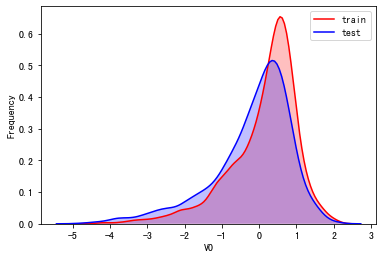

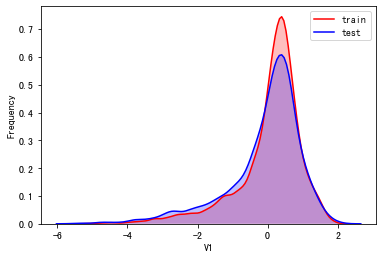

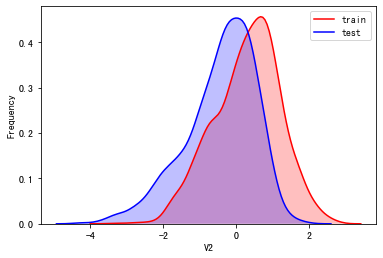

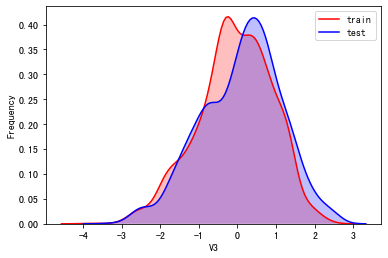

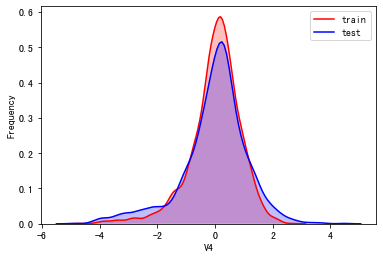

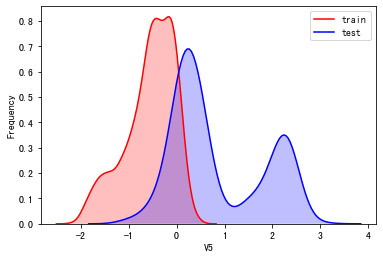

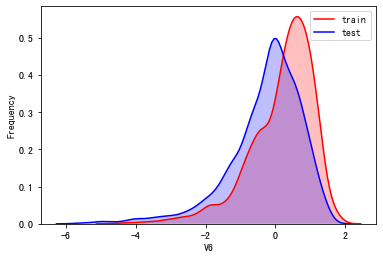

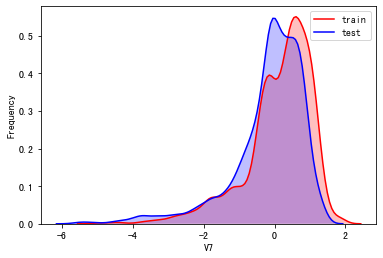

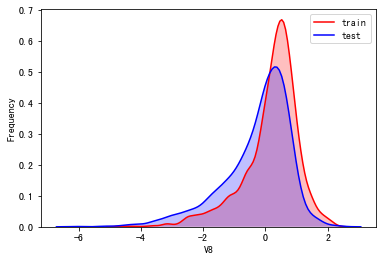

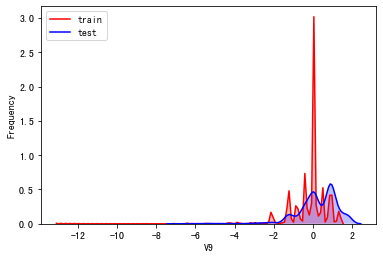

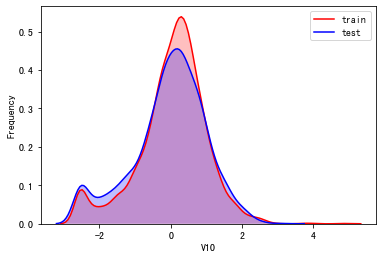

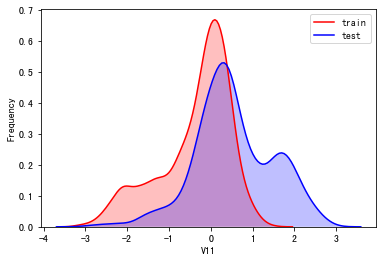

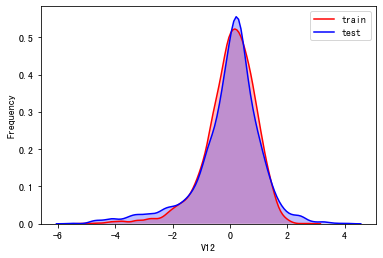

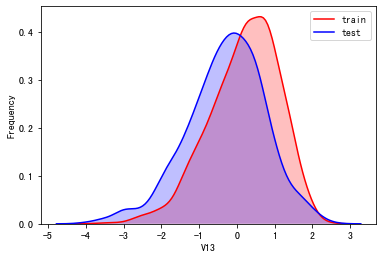

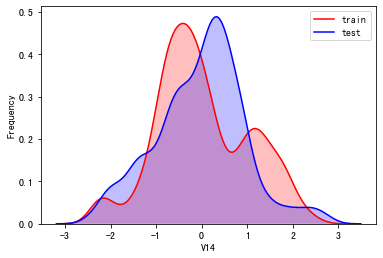

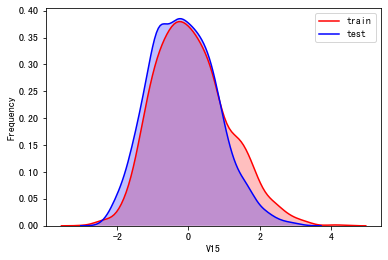

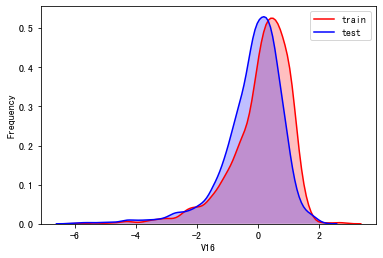

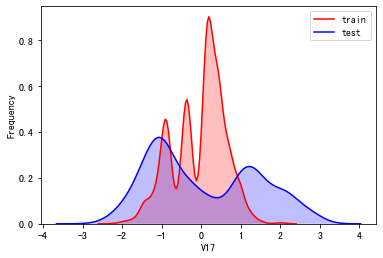

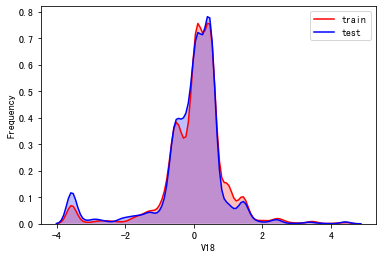

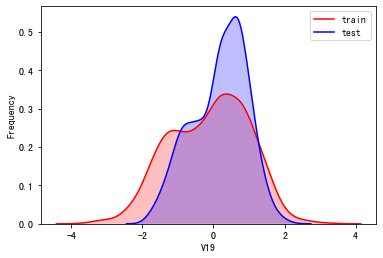

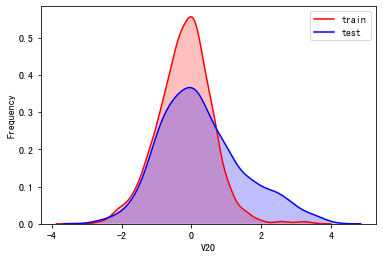

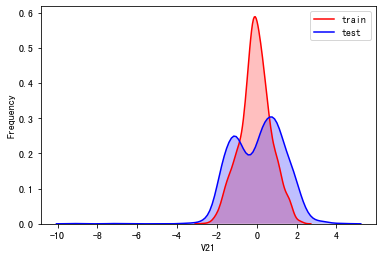

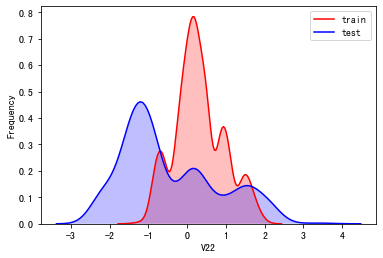

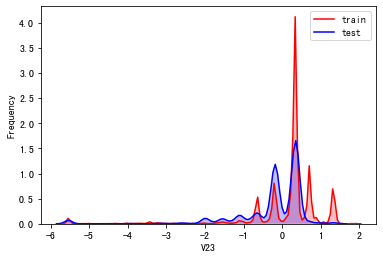

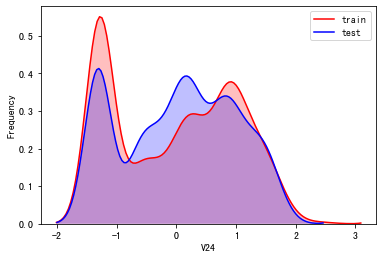

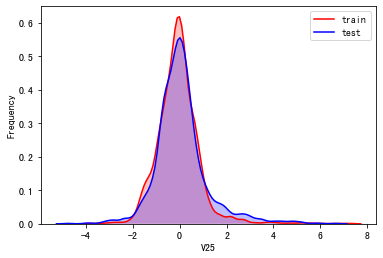

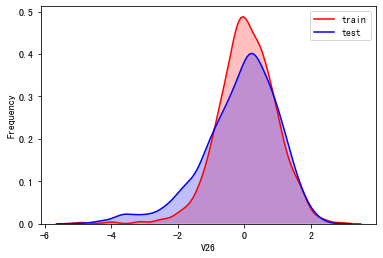

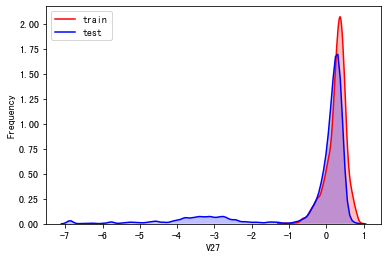

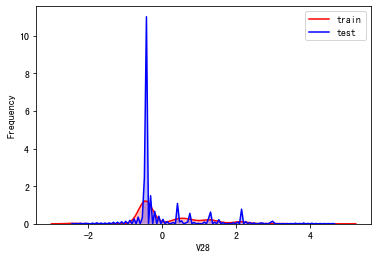

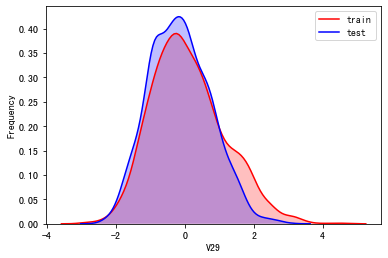

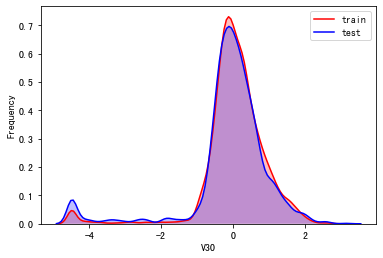

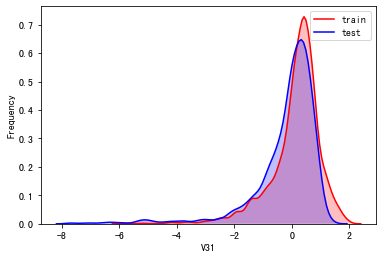

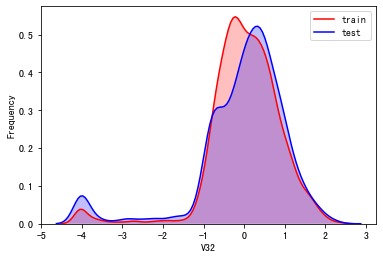

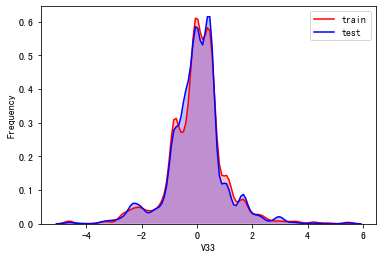

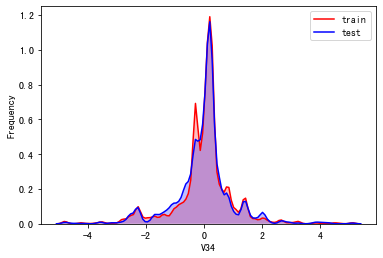

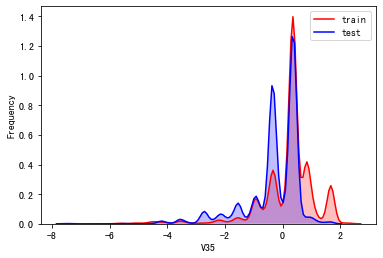

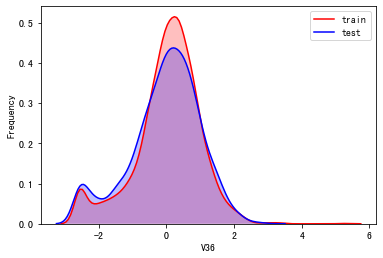

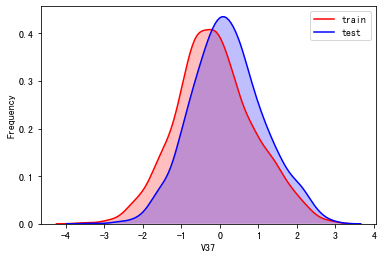

In [37]:
for column in data_all.columns[0:-2]:
    g = sns.kdeplot(data_all[column][(data_all["oringin"] == "train")], color="Red", shade = True)
    g = sns.kdeplot(data_all[column][(data_all["oringin"] == "test")], ax =g, color="Blue", shade= True)
    g.set_xlabel(column)
    g.set_ylabel("Frequency")
    g = g.legend(["train","test"])
    plt.show()

<Figure size 720x720 with 0 Axes>

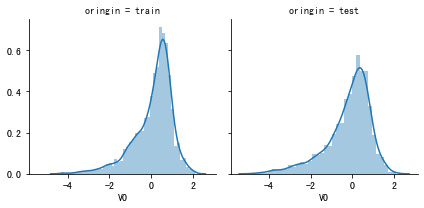

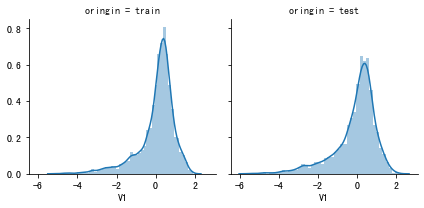

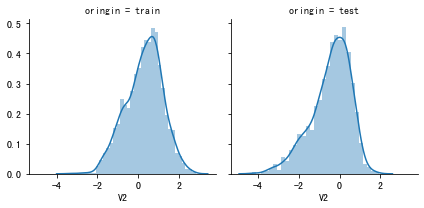

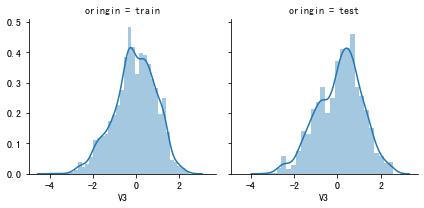

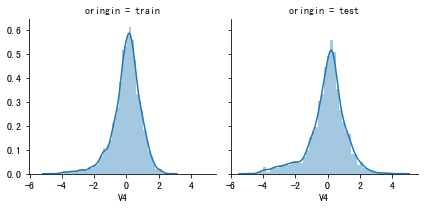

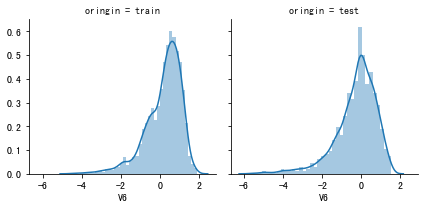

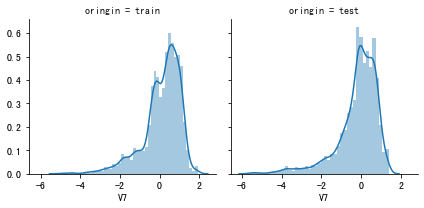

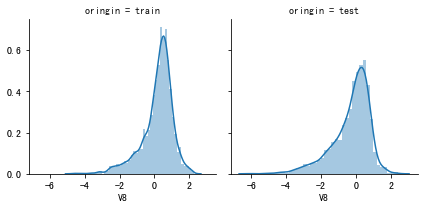

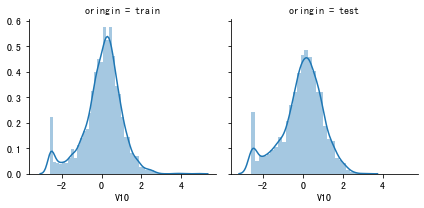

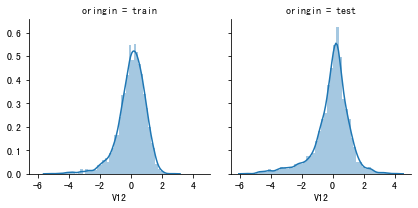

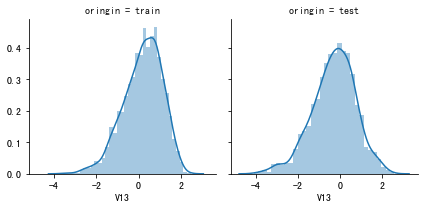

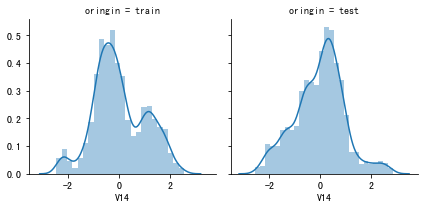

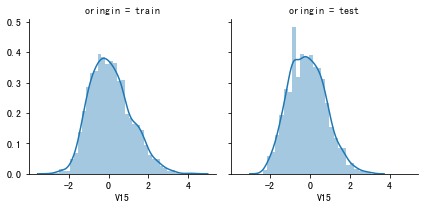

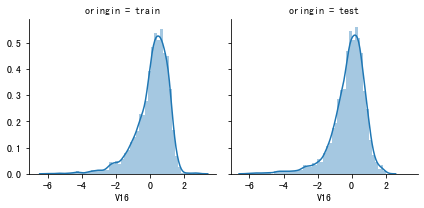

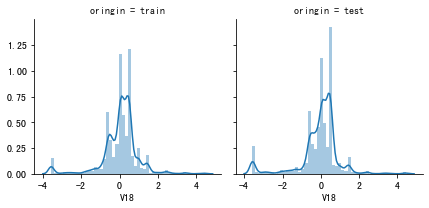

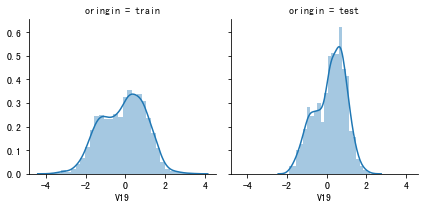

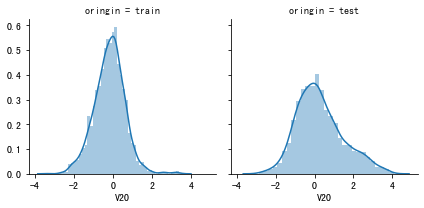

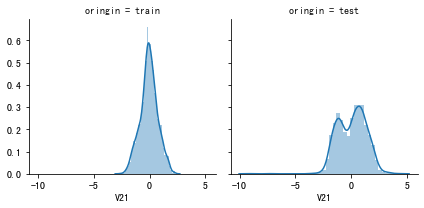

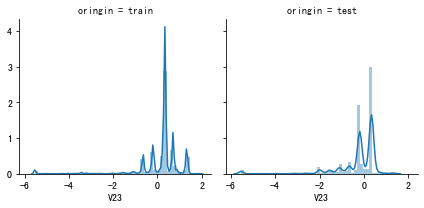

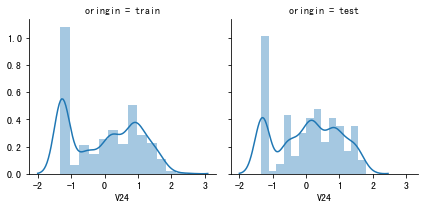

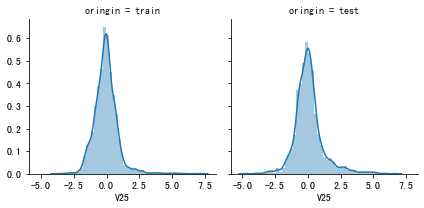

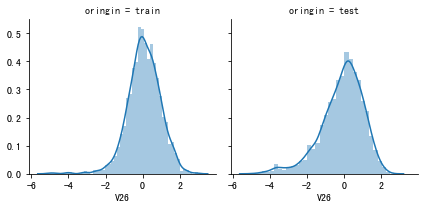

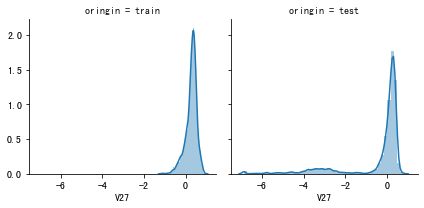

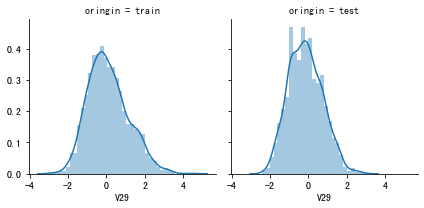

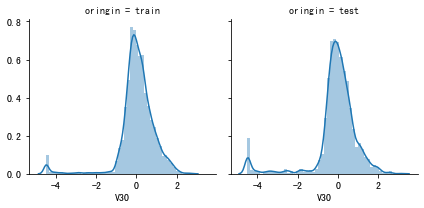

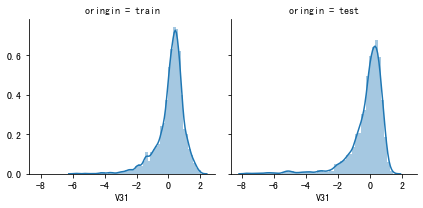

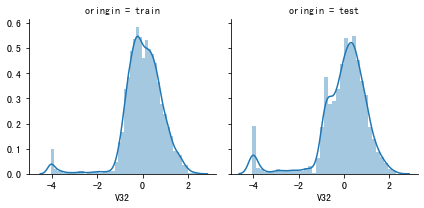

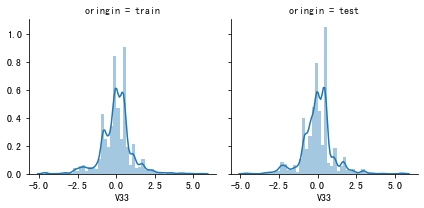

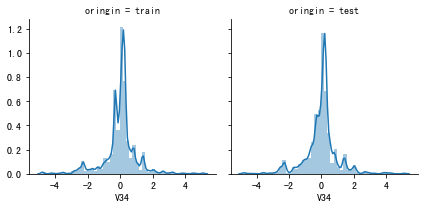

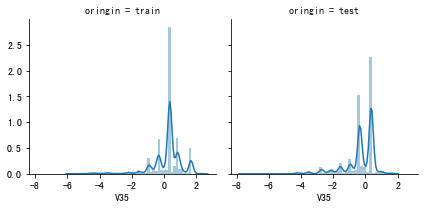

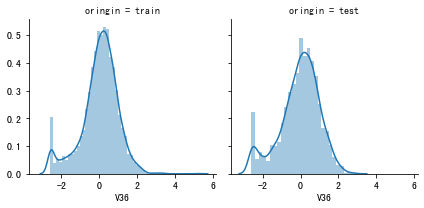

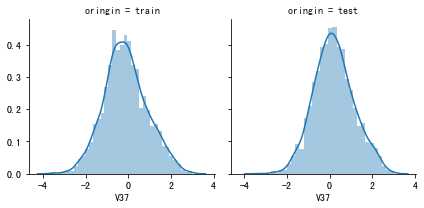

In [45]:
fig = plt.figure(figsize=(10, 10))
for i in range(len(data_all.columns)-2):
    g = sns.FacetGrid(data_all, col='oringin')
    g = g.map(sns.distplot, data_all.columns[i])

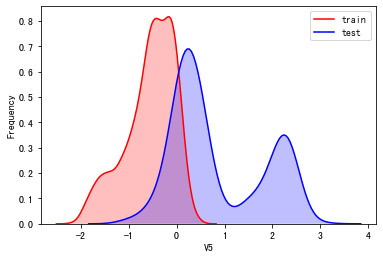

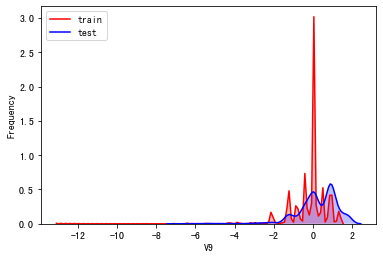

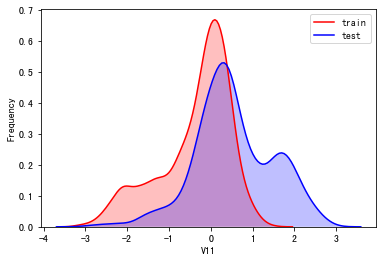

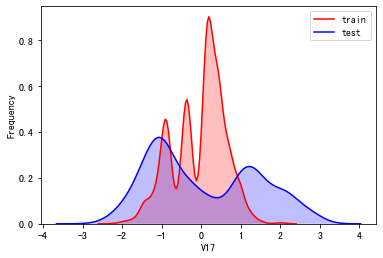

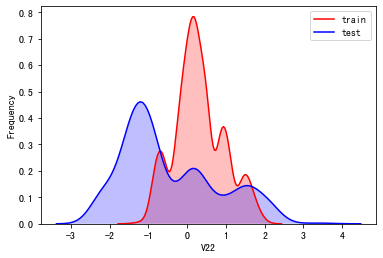

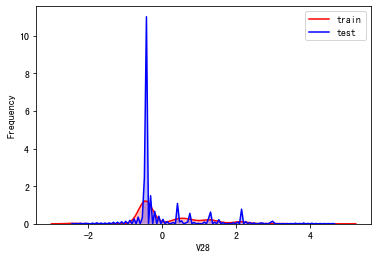

In [39]:
#删除特征"V5","V9","V11","V17","V22","V28"，训练集和测试集分布不均
for column in ["V5","V9","V11","V17","V22","V28"]:
    g = sns.kdeplot(data_all[column][(data_all["oringin"] == "train")], color="Red", shade = True)
    g = sns.kdeplot(data_all[column][(data_all["oringin"] == "test")], ax =g, color="Blue", shade= True)
    g.set_xlabel(column)
    g.set_ylabel("Frequency")
    g = g.legend(["train","test"])
    plt.show()

data_all.drop(["V5","V9","V11","V17","V22","V28"],axis=1,inplace=True)

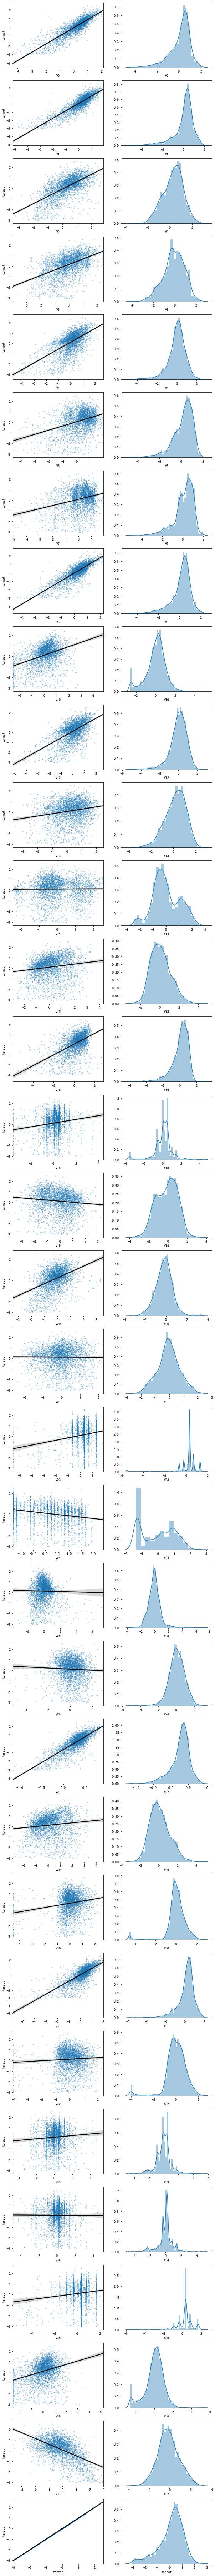

In [46]:
data_train1=data_all[data_all["oringin"]=="train"].drop("oringin",axis=1)

fcols = 2
frows = len(df_train.columns)
plt.figure(figsize=(5*fcols,4*frows))

i=0
for col in data_train1.columns:
    i+=1
    ax=plt.subplot(frows,fcols,i)
    sns.regplot(x=col, y='target', data=df_train, ax=ax, 
                scatter_kws={'marker':'.','s':3,'alpha':0.3},
                line_kws={'color':'k'});
    plt.xlabel(col)
    plt.ylabel('target')
    
    i+=1
    ax=plt.subplot(frows,fcols,i)
    sns.distplot(df_train[col].dropna())
    plt.xlabel(col)

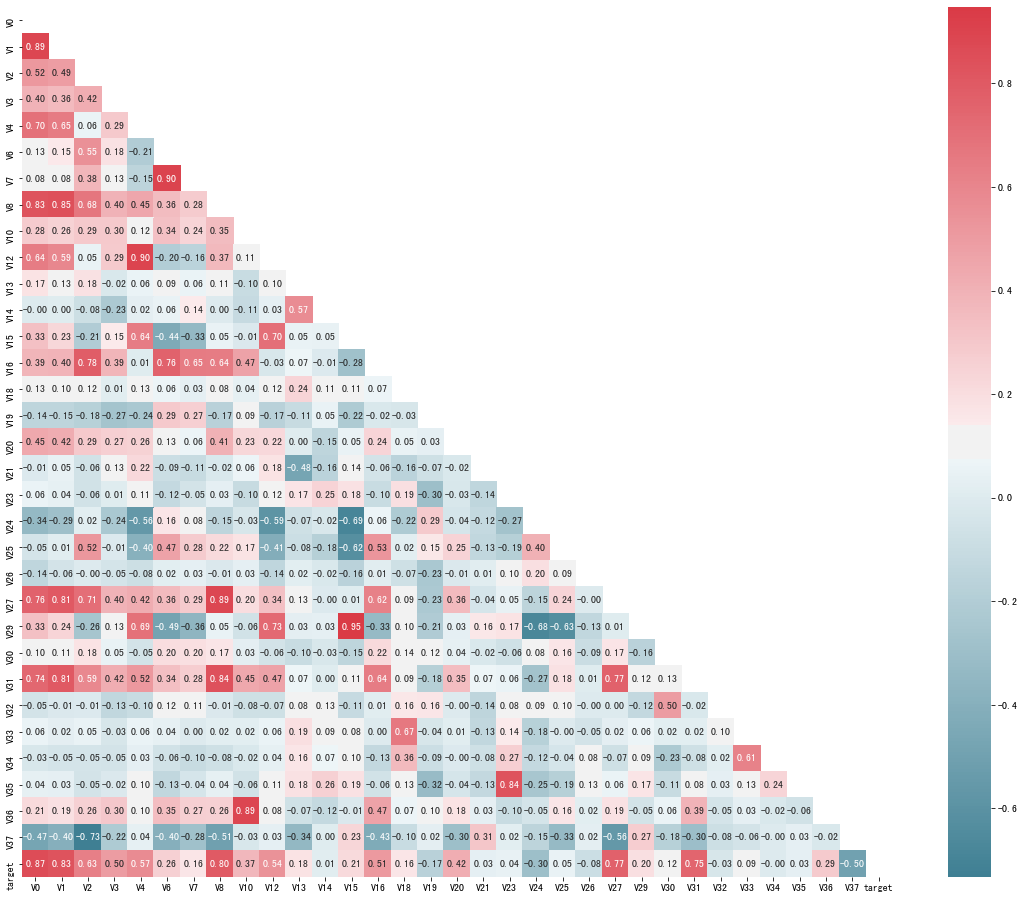

In [47]:
plt.figure(figsize=(20, 16))  # 指定绘图对象宽度和高度
colnm = data_train1.columns.tolist()  # 列表头
mcorr = data_train1[colnm].corr(method="spearman")  # 相关系数矩阵，即给出了任意两个变量之间的相关系数
mask = np.zeros_like(mcorr, dtype=np.bool)  # 构造与mcorr同维数矩阵 为bool型
mask[np.triu_indices_from(mask)] = True  # 角分线右侧为True
cmap = sns.diverging_palette(220, 10, as_cmap=True)  # 返回matplotlib colormap对象
g = sns.heatmap(mcorr, mask=mask, cmap=cmap, square=True, annot=True, fmt='0.2f')  # 热力图（看两两相似度）
plt.show()

In [48]:
# Threshold for removing correlated variables
threshold = 0.1

# Absolute value correlation matrix
corr_matrix = data_train1.corr().abs()
drop_col=corr_matrix[corr_matrix["target"]<threshold].index
data_all.drop(drop_col,axis=1,inplace=True)

In [50]:
# normalise numeric columns
cols_numeric=list(data_all.columns)
cols_numeric.remove("oringin")
def scale_minmax(col):
    return (col-col.min())/(col.max()-col.min())
scale_cols = [col for col in cols_numeric if col!='target']
data_all[scale_cols] = data_all[scale_cols].apply(scale_minmax,axis=0)
data_all[scale_cols].describe()

V0           V1           V2           V3           V4  \
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000   
mean      0.694172     0.721357     0.602300     0.603139     0.523743   
std       0.144198     0.131443     0.140628     0.152462     0.106430   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.626676     0.679416     0.514414     0.503888     0.478182   
50%       0.729488     0.752497     0.617072     0.614270     0.535866   
75%       0.790195     0.799553     0.700464     0.710474     0.585036   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                V6           V7           V8          V10          V12  ...  \
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000  ...   
mean      0.748823     0.745740     0.715607     0.348518     0.578507  ...   
std       0.132560     0.132577     0.118105     0.134882     0.105088  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.683324     0.696938     0.664934     0.284327     0.532892  ...   
50%       0.774125     0.771974     0.742884     0.366469     0.591635  ...   
75%       0.842259     0.836405     0.790835     0.432965     0.641971  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

               V20          V23          V24          V27          V29  \
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000   
mean      0.456147     0.744438     0.356712     0.881401     0.388683   
std       0.134083     0.134085     0.265512     0.128221     0.133475   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.370475     0.719362     0.040616     0.888575     0.292445   
50%       0.447305     0.788817     0.381736     0.916015     0.375734   
75%       0.522660     0.792706     0.574728     0.932555     0.471837   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               V30          V31          V35          V36          V37  
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000  
mean      0.589459     0.792709     0.762873     0.332385     0.545795  
std       0.130786     0.102976     0.102037     0.127456     0.150356  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.550092     0.761816     0.727273     0.270584     0.445647  
50%       0.594428     0.815055     0.800020     0.347056     0.539317  
75%       0.650798     0.852229     0.800020     0.414861     0.643061  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 25 columns]

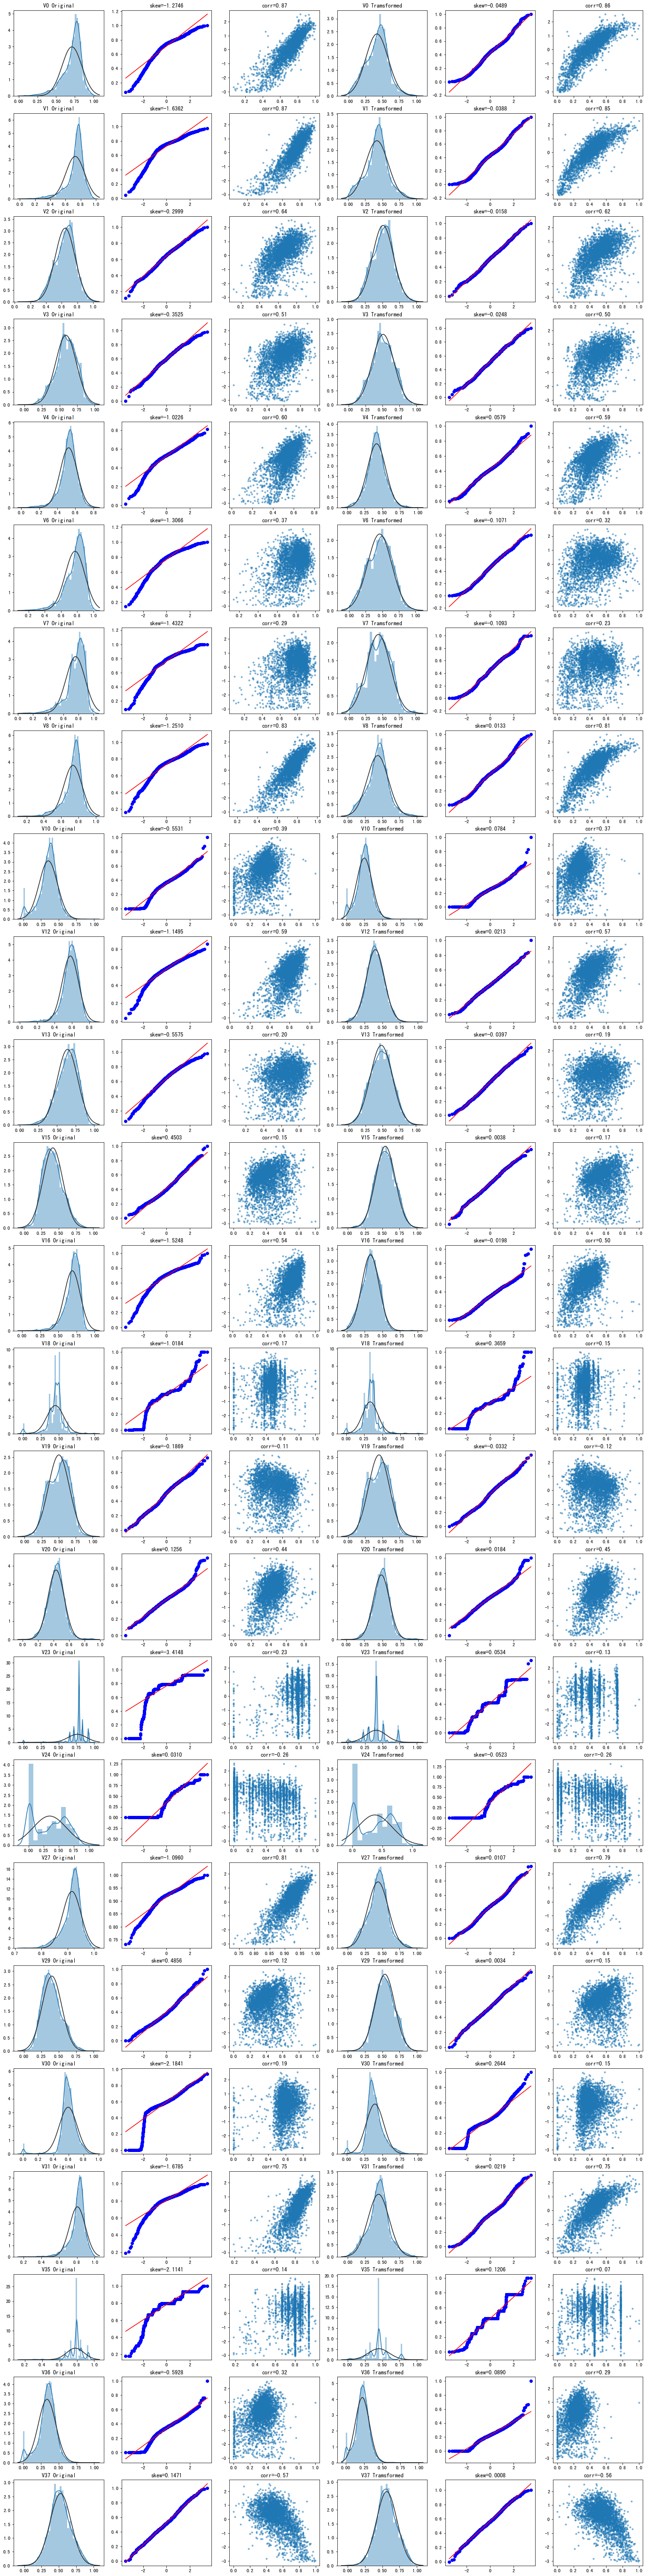

In [55]:
# figure parameters
data_train1=data_all[data_all["oringin"]=="train"].drop("oringin",axis=1)

fcols = 2
frows = len(cols_numeric)-1
plt.figure(figsize=(4*fcols,4*frows
i=0

for var in cols_numeric
    if var!='target':
        dat = data_all[[var, 'target']].dropna()

        i+=1
        plt.subplot(frows,fcols,i)
        sns.distplot(dat[var] , fit=stats.norm);
        plt.title(var+' Original')
        plt.xlabel('')
        
        i+=1
        plt.subplot(frows,fcols,i)
        _=stats.probplot(dat[var], plot=plt)
        plt.title('skew='+'{:.4f}'.format(stats.skew(dat[var])))
        plt.xlabel('')
        plt.ylabel('')
        
        i+=1
        plt.subplot(frows,fcols,i)
        plt.plot(dat[var], dat['target'],'.',alpha=0.5)
        plt.title('corr='+'{:.2f}'.format(np.corrcoef(dat[var], dat['target'])[0][1]))
 
        i+=1
        plt.subplot(frows,fcols,i)
        trans_var, lambda_var = stats.boxcox(dat[var].dropna()+1)
        trans_var = scale_minmax(trans_var)      
        sns.distplot(trans_var , fit=stats.norm);
        plt.title(var+' Tramsformed')
        plt.xlabel('')
        
        i+=1
        plt.subplot(frows,fcols,i)
        _=stats.probplot(trans_var, plot=plt
        plt.title('skew='+'{:.4f}'.format(stats.skew(trans_var)))
        plt.xlabel('')
        plt.ylabel('')

        i+=1
        plt.subplot(frows,fcols,i)
        plt.plot(trans_var, dat['target'],'.',alpha=0.5)
        plt.title('corr='+'{:.2f}'.format(np.corrcoef(trans_var,dat['target'])[0][1]))

In [56]:
cols_transform=data_all.columns[0:-2]
for col in cols_transform:   
    # transform column
    data_all.loc[:,col], _ = stats.boxcox(data_all.loc[:,col]+1)

count    2888.000000
mean        0.126353
std         0.983966
min        -3.044000
25%        -0.350250
50%         0.313000
75%         0.793250
max         2.538000
Name: target, dtype: float64


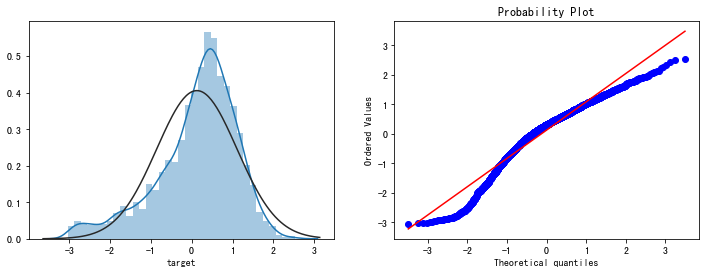

In [57]:
print(data_all.target.describe())

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(data_all.target.dropna() , fit=stats.norm);
plt.subplot(1,2,2)
_=stats.probplot(data_all.target.dropna(), plot=plt)

count    2888.000000
mean        1.129957
std         0.394110
min         0.291057
25%         0.867609
50%         1.135315
75%         1.379382
max         2.798463
Name: target, dtype: float64


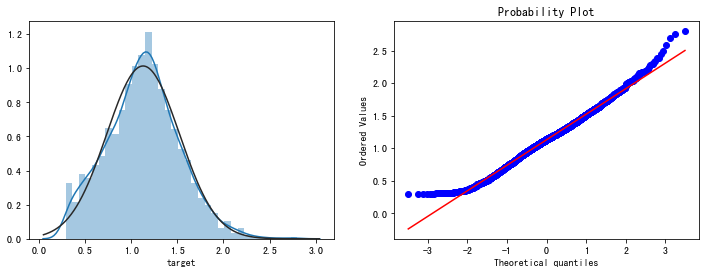

In [60]:
#Log Transform SalePrice to improve normality
sp = df_train.target
df_train.target1 =np.power(1.5,sp)
print(df_train.target1.describe())

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(df_train.target1.dropna(),fit=stats.norm);
plt.subplot(1,2,2)
_=stats.probplot(df_train.target1.dropna(), plot=plt)

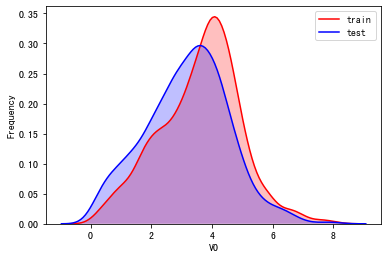

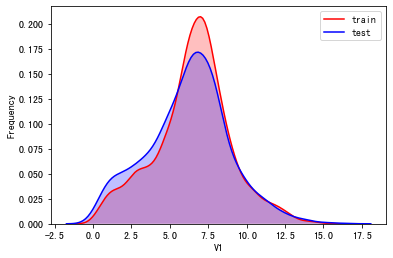

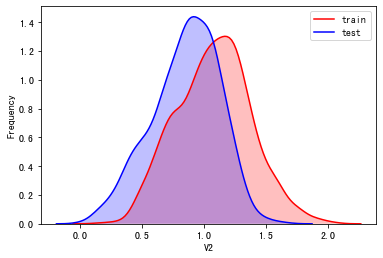

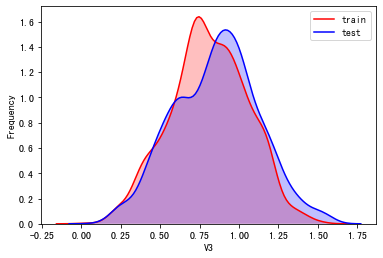

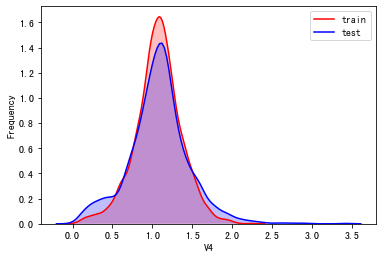

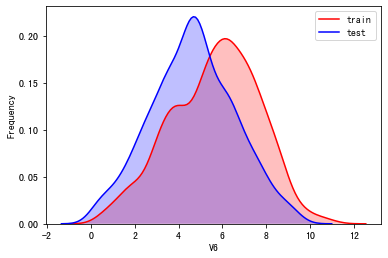

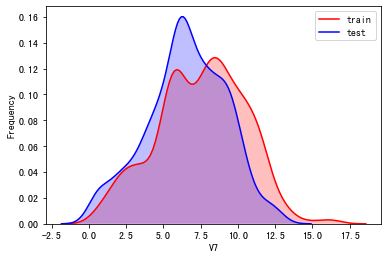

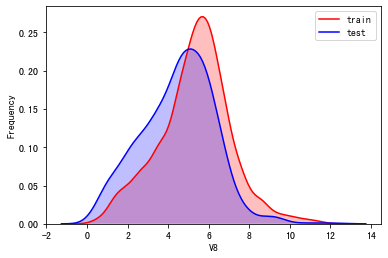

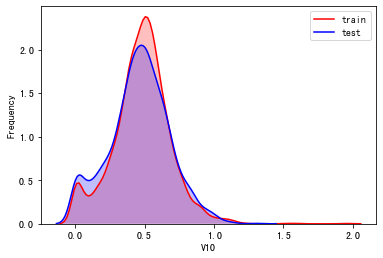

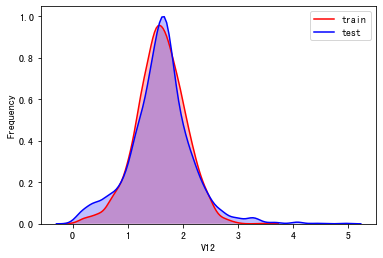

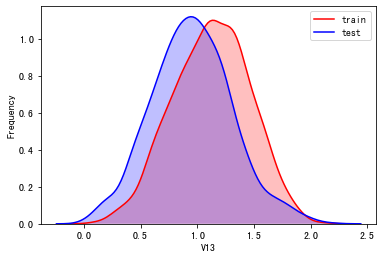

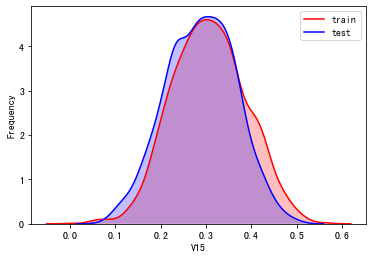

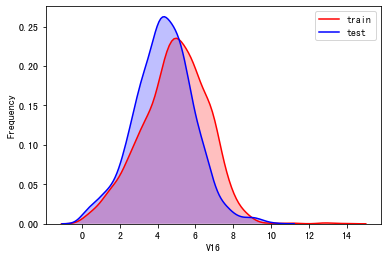

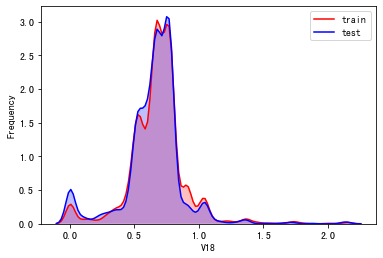

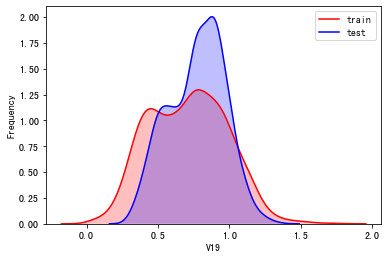

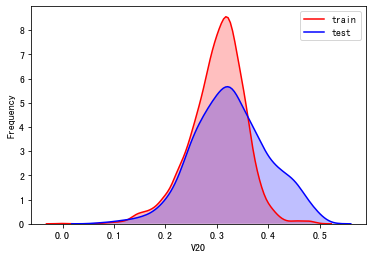

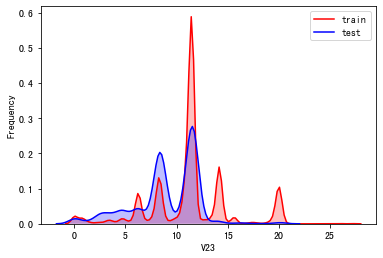

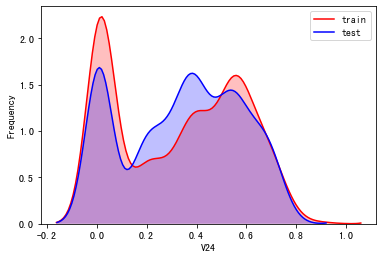

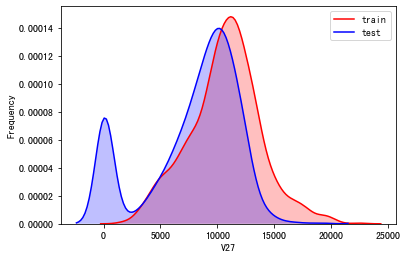

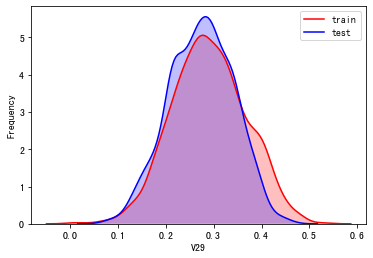

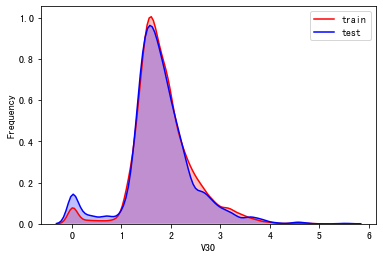

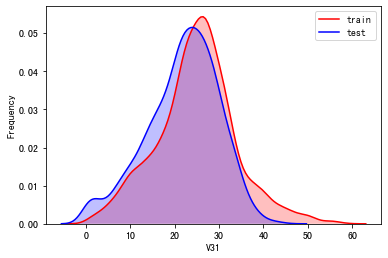

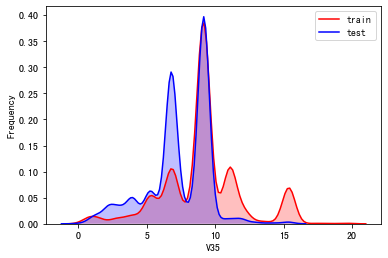

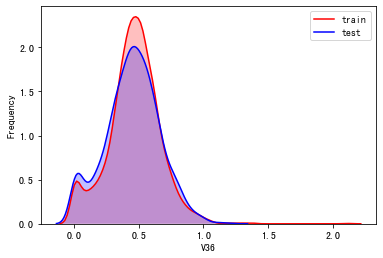

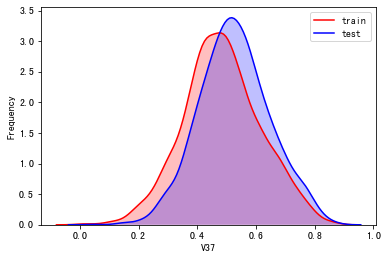

In [61]:
for column in data_all.columns[0:-2]:
    g = sns.kdeplot(data_all[column][(data_all["oringin"] == "train")], color="Red", shade = True)
    g = sns.kdeplot(data_all[column][(data_all["oringin"] == "test")], ax =g, color="Blue", shade= True)
    g.set_xlabel(column)
    g.set_ylabel("Frequency")
    g = g.legend(["train","test"])
    plt.show()

### 划分训练集和测试集

##### 线性模型

In [17]:
from sklearn.model_selection import train_test_split

In [65]:
df_train_finally = data_all[data_all["oringin"]=="train"]
df_train_finally["label"]=df_train_finally['target']
# split SalePrice and features
y = df_train_finally['target']
X = df_train_finally.drop(["oringin","target","label"],axis=1)


In [74]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [75]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [67]:
lin_reg.score(X_test,y_test)

0.8457450712678904

##### 决策树

In [68]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

##### SVC

### 评估数据
使用 RMSE评估

In [76]:
# 线性模型误差
from sklearn.metrics import mean_squared_error
y_predict = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test,y_predict)
lin_mse

0.11382002358993513

In [95]:
lin_rmse = np.sqrt(lin_mse)
lin_mse

0.11382002358993513

In [71]:
# 决策树模型误差
y_predictions = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, y_predictions)
tree_mse


0.2562304336793541

In [72]:
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.5061920916799808

In [77]:
X_train

V0         V1        V2        V3        V4        V6         V7  \
1427  3.973185   7.142594  1.344462  0.637401  0.962341  6.943493  10.472194   
965   4.579636   8.621860  1.330244  1.205887  1.328104  4.817785   7.105944   
1234  4.123817   6.757804  0.992337  0.785718  1.228182  3.135789   5.005370   
662   4.828509   8.604642  1.236771  1.202897  1.510270  7.212701   9.202131   
2409  3.468554   5.404272  1.417463  0.624233  0.784425  7.793896  10.293089   
...        ...        ...       ...       ...       ...       ...        ...   
1638  3.749065   5.976257  0.640918  0.734930  1.043694  5.917175  10.116571   
1095  4.821942  10.634508  0.898875  0.789058  1.803470  3.327306   5.055605   
1130  3.533234   6.457843  0.954443  0.868500  0.796862  3.051398   4.631201   
1294  6.417436  11.293425  1.312020  0.766542  1.576356  3.749684   5.560150   
860   4.995017   9.325523  1.547501  1.112469  1.424480  8.464145  10.580911   

            V8       V10       V12  ...       V20        V23       V24  \
1427  6.755785  0.401861  1.394603  ...  0.287791  20.082886  0.496905   
965   7.484855  0.672493  1.876749  ...  0.322636  20.104653  0.346316   
1234  4.684242  0.189155  1.990836  ...  0.279212  11.247638  0.007690   
662   7.500319  0.480841  1.777871  ...  0.351545  12.863261  0.006100   
2409  6.054952  0.571829  1.233458  ...  0.286175   8.286156  0.734756   
...        ...       ...       ...  ...       ...        ...       ...   
1638  4.855079  0.375741  1.521840  ...  0.257682  11.447038  0.603901   
1095  6.954104  0.352976  2.407962  ...  0.428654  15.629955  0.005835   
1130  4.598606  0.635952  1.207492  ...  0.384319  18.659896  0.598606   
1294  8.825920  0.523231  2.217679  ...  0.347523  11.227863  0.007690   
860   7.960377  0.465156  1.885924  ...  0.310966  11.221278  0.227023   

               V27       V29       V30        V31        V35       V36  \
1427  13508.793558  0.244530  2.083517  28.780559  15.384823  0.385258   
965   12072.431836  0.353262  2.260454  34.490856  15.384823  0.606117   
1234  10424.298998  0.369145  2.217509  20.314932   9.178637  0.212278   
662   15050.508100  0.261947  1.584700  30.726563   9.636962  0.468653   
2409  10040.598807  0.189548  1.726873  21.610386   5.356508  0.531368   
...            ...       ...       ...        ...        ...       ...   
1638   9104.564246  0.263692  2.326466  18.402341   9.178637  0.375154   
1095  14347.759370  0.403984  1.538023  29.575221  12.226316  0.289435   
1130   9953.012492  0.240132  1.302530  20.997752  13.728413  0.396271   
1294  17170.549758  0.405171  1.633086  48.725709   9.178637  0.568261   
860   15310.630216  0.308241  1.431508  35.476032   9.178637  0.570598   

           V37  
1427  0.335487  
965   0.549109  
1234  0.476285  
662   0.474206  
2409  0.242898  
...        ...  
1638  0.510298  
1095  0.536727  
1130  0.469002  
1294  0.442220  
860   0.303860  

[2310 rows x 25 columns]

## 对测试集进行预测

In [79]:
df_test_finally = df_test[list(X_train.columns)]

In [87]:
df_test_predict = lin_reg.predict(df_test_finally)
df_test_predict

array([-2.49467158, -2.47026749, -2.17113414, ..., -8.62619261,
       -8.3192776 , -6.67430267])

-2.4946715775273383
-2.470267494791931
-2.1711341388111505
-2.30976434443217
-0.7639121724661662
-1.1152237505043257
-2.2392879351346147
-0.45188190034848574
-1.4627086567791736
-0.652241842111883
-2.437348595401941
-2.7863977395516617
-2.593834328077937
-1.4930403578336746
-1.730958465769421
-2.0717764187437946
-1.723249713996922
-1.5793757838307618
-1.1708209365611963
-0.4344337544932122
0.2667920322869173
0.11000079428343268
0.8925398232744741
0.218182082115276
-0.05383429579393528
-0.448581689439457
-0.06560818207321306
-1.3841179339060075
-1.448548640429766
-1.5847397400711003
-1.1920832048403827
-0.41131233630403363
-1.5813345324406454
-0.774921488103208
-1.1881874337218292
-1.409026689184812
-0.6158434527053951
-0.5875171057215627
-0.9820798544252183
-1.0369580081027308
-0.451267027990248
-0.0823868822638989
-0.7113335722342113
-1.4059837290211756
-1.6656456820451795
-1.812422849782168
-0.0612319145335265
0.4177389709579522
0.6082422825648544
-0.014891192278621013
-0.08819900124

In [98]:
for i in df_test_predict:
    with open ('predict.csv','a')as f:
        f.write(str(round(i,3)))
        f.write("\n")

0.111